<a href="https://colab.research.google.com/github/Sans-dubey/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Sanskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Sanskar Dubey


# **Project Summary -**

#### In this project, we analyzed a transactional dataset spanning from 01/12/2010 to 09/12/2011 for a UK-based online retail company specializing in unique all-occasion gifts. The objective was to segment the diverse customer base based on purchasing behaviors for tailored strategies. After exploring the dataset and addressing missing values, duplicates, and outliers, we applied RFM (Recency, Frequency, Monetary) modeling to capture customer engagement.

#### Using K-Means, Hierarchical, and DBSCAN clustering, we categorized customers by their RFM scores, unveiling distinct segments with varying purchasing patterns. Insights revealed peak transaction periods, popular product categories per segment, and identified wholesalers. This segmentation enables targeted marketing, inventory optimization, and improved customer experiences.
#### In conclusion, this project addressed the challenge of customer segmentation for an online retail company. Through rigorous data exploration, feature engineering, preprocessing, and the application of unsupervised machine learning techniques, we successfully delineated distinct customer segments. By understanding the unique behaviors and preferences of these segments, the company can now implement targeted strategies to foster customer engagement, loyalty, and business growth.


# **GitHub Link -**

https://github.com/Sans-dubey/Online_Retail_Customer_Segmentation.git

# **Problem Statement**


#### The objective of this project is to perform a comprehensive analysis of a transnational dataset containing transactional records from a UK-based and registered non-store online retail company. The company specializes in offering a wide range of unique all-occasion gifts and caters to a diverse customer base, including both individual consumers and wholesalers. The primary goal of this project is to identify and define major customer segments within the dataset, enabling the company to gain insights into customer behavior, preferences, and patterns.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
from numpy import math
import pandas as pd

# Import Visualization Libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import warings

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples

# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Display utilities
from IPython.display import Markdown, display


### Dataset Loading

In [2]:
# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
retail_df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

### Dataset First View

In [5]:
# Dataset First Look

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

retail_df.shape

(541909, 8)

### Dataset Information

In [7]:
# Dataset Info

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

duplicated_count = retail_df.duplicated().sum()
print(f'Total number of duplicate values in the dataset : {duplicated_count}')

Total number of duplicate values in the dataset : 5268


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

missing_values_count = retail_df.isnull().sum()
missing_values_count

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Description and CustomerID are two columns which contain Missing values in the dataset.

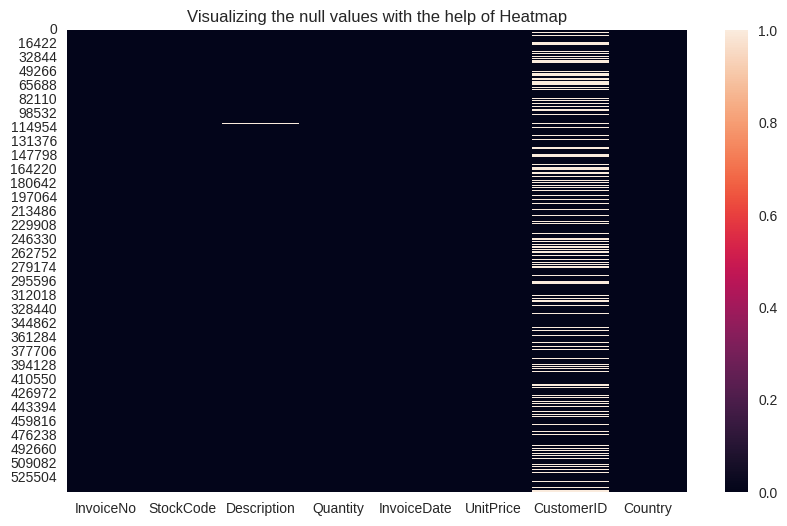

In [10]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.heatmap(retail_df.isnull())
plt.title('Visualizing the null values with the help of Heatmap')
plt.show()

### What did you know about your dataset?

#### 1.  Dataset consists 541909 data points across 8 columns.
#### 2 . Total number of duplicate values in the dataset : 5268
#### 3. Description and CustomerID are two columns which contains Missing values in the dataset.
#### Missing Data Percentage

*   CustomerID - 24.93%
*   Description - 0.27%



#### 4. The dataset contains transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
#### 5. The company mainly sells unique all-occassion gifts.
#### 6. Many customers of the company are wholesalers.



## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns

retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe

retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Variables Description

* **InvoiceNo** - Invoice Number - Nominal, A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', It indicates a cancellation.
* **StockCode** - Stock Name Code - Product (item) code Nominal, A 5-digit integral number uniquely assigned to each distinct product.
* **Description** - Description of the Product
* **Quantity** - Quantity Bought
* **InvoiceDate** - Invoice Date - The day and time when each transaction was generated.
* **UnitPrice** - Price per unit
* **CustomerID** - Unique Customer Id
* **Country** - Location - Name of the country where each customer resides.

#### --> There are 3 numerical , 4 categorical column and 1 Datetime column are present in the Dataset.

#### --> Numerical Columns - : [ 'Quantity', 'Unit Price','CustomerID']

#### --> Categorical Columns -: ['InvoiceNo', 'StockCode', 'Description','Country']

#### --> Datetime Column -: ['InvoiceDate']

#### --> Descriptive summary of the dataset looks overall good some feature may contain outliers.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

#### Data wrangling, also known as data preprocessing, is the process of cleaning, transforming, and organizing raw data into a structured format for analysis, modeling, and decision-making. This involves tasks such as removing errors, handling missing values, converting data types, and creating new features,for further analysis and interpretation.

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

### 1. Handling Missing Values

In [15]:
#missing Values counts and percentage

missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Values count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))

print('**'*12)
print('Missing Values Percentage')
print(round(retail_df[missing].isnull().sum().sort_values(ascending=False)/len(retail_df)*100,2))

Missing Values count
CustomerID     135080
Description      1454
dtype: int64
************************
Missing Values Percentage
CustomerID     24.93
Description     0.27
dtype: float64




####--> A significant proportion of the data, precisely 24.93% of entries, lacks values in the "Customer_ID" field. This absence of customer assignments renders the data unsuitable for cluster formation, So we will remove them from the dataset.


In [16]:
# Dropping the rows with null values from the Customer_ID

retail_df.dropna(subset=['CustomerID'],inplace=True)

In [17]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### 2. Handling Duplicate Values

In [18]:
# Duplicate value count in the dataset

duplicate_val_count = retail_df.duplicated().sum()
duplicate_val_count

5225

####-->  Total number of duplicate values in the dataset : 5268 So, we will drop them from the dataset.

In [19]:
# Drop duplicate rows in the entire DataFrame

retail_df.drop_duplicates(inplace=True)

In [20]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [21]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
# We have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation

retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

#### --> There are some entries in the InvoiceNO which starts with 'c' and 'c'  indicates cancellation, So we are dropping the cancel transactions from the dataset.

In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [24]:
# Creating some new features based on given feature Invoice Date

retail_df["Year"]  = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df['Month'] = retail_df['InvoiceDate'].apply(lambda x: x.month_name())
retail_df['Day']   = retail_df['InvoiceDate'].apply(lambda x: x.day_name())
retail_df["Hour"]  = retail_df["InvoiceDate"].apply(lambda x: x.hour)


In [25]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8


In [26]:
# Creating a new feature Time_of_Day to represent different time of the day

def Time_of_Day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [27]:
# Apply the categorization function to the 'Hour' column

retail_df['Time_of_Day'] = retail_df['Hour'].apply(Time_of_Day)

In [28]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Time_of_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning


In [29]:
# Creating a new feature Total Price

retail_df['Total_Price'] = retail_df['Quantity']*retail_df['UnitPrice']

In [30]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Time_of_Day,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,20.34


### What all manipulations have you done and insights you found?

##### 1. Deal with missing values.
##### 2. Deal Duplicate Records.
##### 3. Created some new features such as Year, Month, Day and Hour based on given features Invoice Date This temporal context helps us uncover time-related patterns in the data.
##### 4.  Creating a new feature Time_of_Day to represent different segments of the days such as Morning,Afternoon, Evening and Night. This way, we can see if there are patterns in customer behavior at different times of the day.
##### 5. We combined the "Unit Price" of an item with the number of items purchased ("Quantity") to find out how much money a customer spent in total. This gives us a clear idea of their overall spending.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [31]:
# Chart - 1 visualization code

# Creating a bar chart to display Top 5 products with maximum and mininmum selling

Description_df = retail_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)

In [32]:
Top_5_products_ = Description_df.head(5)

In [33]:
Top_5_products_

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


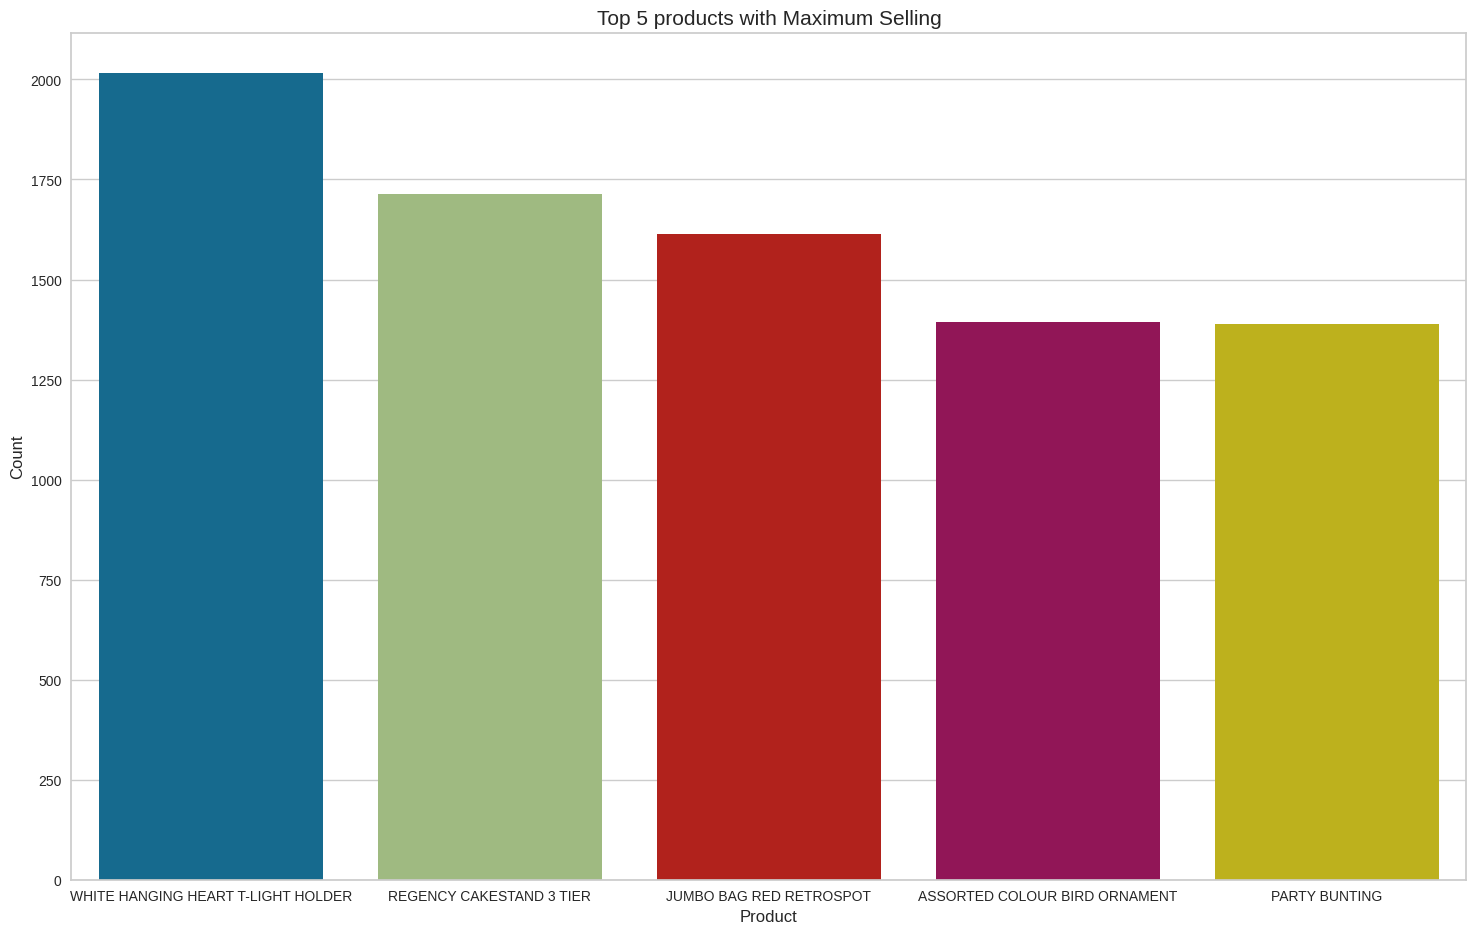

In [34]:
# Creating a Bar plot to display Top 5 products with maximum selling

plt.figure(figsize=(18,11))
sns.barplot(x=Top_5_products_['Description_Name'],y=Top_5_products_['Count'],data = Top_5_products_)
plt.title('Top 5 products with Maximum Selling',size=15)
plt.xlabel('Product',size=12)
plt.ylabel('Count',size=12)
plt.show()

In [35]:
Bottom_5_products = Description_df.tail()

In [36]:
Bottom_5_products

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


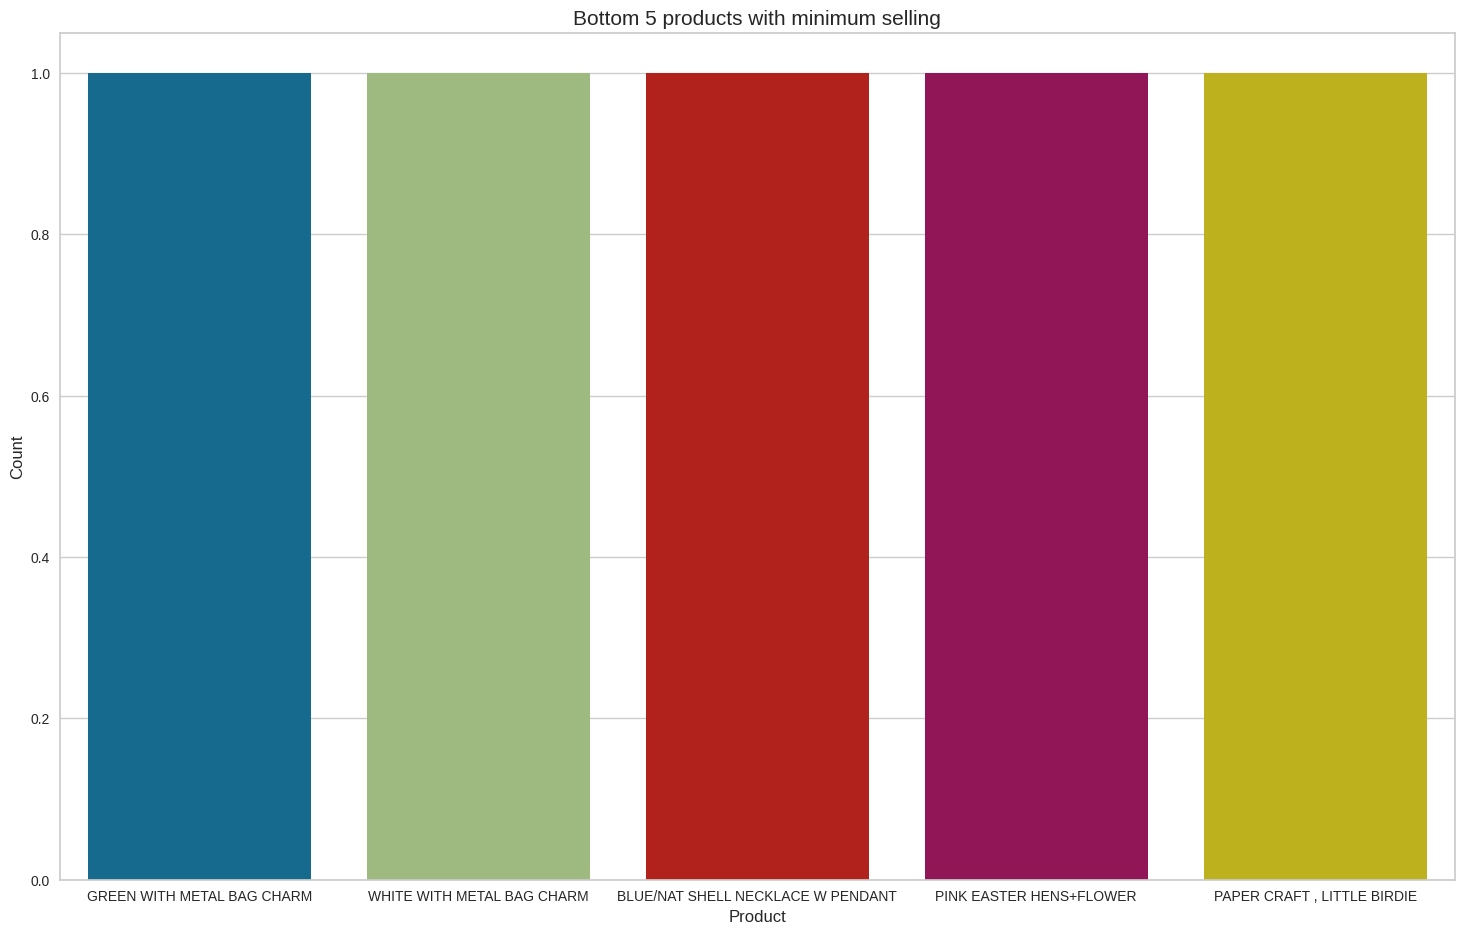

In [37]:
# Creating a Bar plot to display Bottom 5 products with minimum selling

plt.figure(figsize=(18,11))
sns.barplot(x=Bottom_5_products['Description_Name'],y=Bottom_5_products['Count'],data = Bottom_5_products)
plt.title('Bottom 5 products with minimum selling',size=15)
plt.xlabel('Product',size=12)
plt.ylabel('Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to visualize the Top 5 products based on Maximum selling and Bottom 5 products with minimum sellings.

##### 2. What is/are the insight(s) found from the chart?

#### WHITE HANGING HEART T-LIGHT HOLDER,	REGENCY CAKESTAND 3 TIER, JUMBO BAG REDRETROSPOT,	ASSORTED COLOUR BIRD ORNAMENT	and PARTY BUNTING are the products with the maximum selling.

#### GREEN WITH METAL BAG CHARM	,	WHITE WITH METAL BAG CHARM, BLUE/NAT SHELL NECKLACE W PENDANT, PINK EASTER HENS+FLOWER, 	PAPER CRAFT , LITTLE BIRDIE are the products with the mimnimum selling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, The gained insight help in creating positive business impact.

#### Chart - 2

In [38]:
# Chart - 2 visualization code

Country_df = retail_df['Country'].value_counts().reset_index()
Country_df.rename(columns={'index': 'Country','Country': 'Count'}, inplace=True)

In [39]:
Top_5_countries = Country_df.head()

In [40]:
Top_5_countries

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


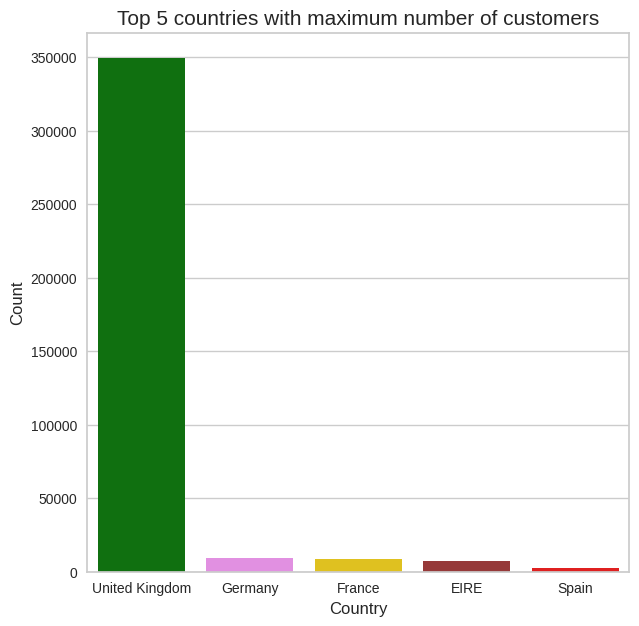

In [41]:
# Creating a Bar plot to display Top 5 countries with maximum number of customers

plt.figure(figsize=(7,7))
colors = [ "green","violet",'gold','brown',"red"]
sns.barplot(x=Top_5_countries['Country'],y=Top_5_countries['Count'],data=Top_5_countries,palette=colors)
plt.title('Top 5 countries with maximum number of customers',size=15)
plt.xlabel('Country',size=12)
plt.ylabel('Count',size=12)
plt.show()

In [42]:
Bottom_5_countries = Country_df.tail()

In [43]:
Bottom_5_countries

,Country,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


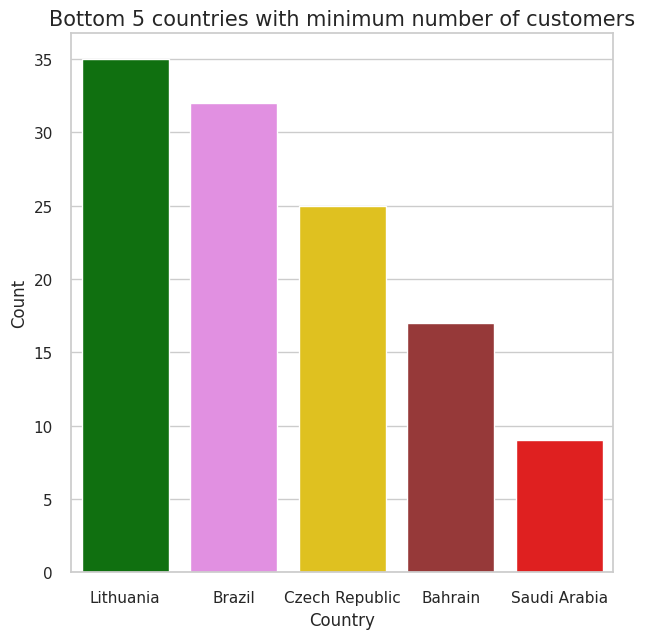

In [125]:
# Creating a Bar plot to display Bottom 5 countries with minimum number of customers

plt.figure(figsize=(7,7))
colors = [ "green","violet",'gold','brown',"red"]
sns.barplot(x=Bottom_5_countries['Country'],y=Bottom_5_countries['Count'],data=Bottom_5_countries,palette=colors)
plt.title('Bottom 5 countries with minimum number of customers',size=15)
plt.xlabel('Country',size=12)
plt.ylabel('Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to visualize the Top 5 Countries with maximum number of customers and Bottom 5 Countries with minimum number of customers.

##### 2. What is/are the insight(s) found from the chart?

#### --> United Kingdom, Germany, France, EIRE and spain are the top 5 countries where the customers bought product in maximum number.
#### --> Lithuania, Brazil, Czech Republic, Bahrain and Saudi Arabia are the bottom 5 coutries where the customers bought product in minimum number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained insights help in creating positive business impact.

#### Chart - 3

In [45]:
# Chart - 3 visualization code

stockcode_df = retail_df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode','StockCode': 'Count'}, inplace=True)

In [46]:
Top_5_stockCode_name = stockcode_df.head()

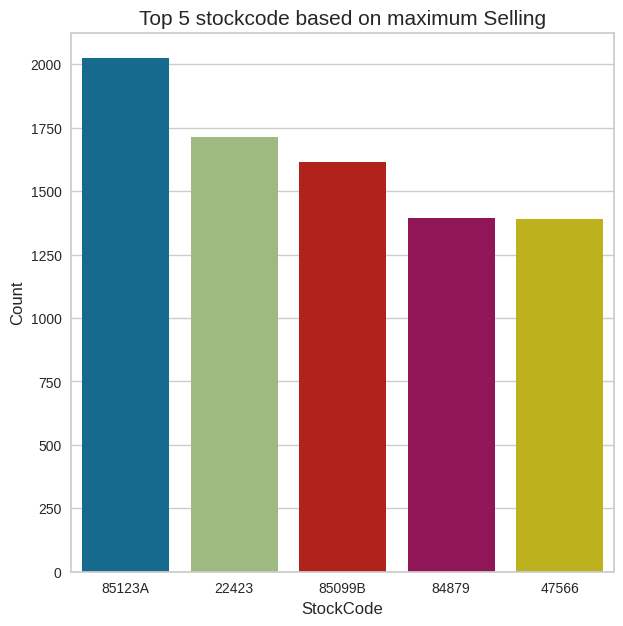

In [47]:
# Creating a Bar plot to display Top 5 stockcode name with maximum number of selling

plt.figure(figsize=(7,7))
sns.barplot(x=Top_5_stockCode_name['StockCode'],y=Top_5_stockCode_name['Count'],data=Top_5_stockCode_name)
plt.title('Top 5 stockcode based on maximum Selling',size=15)
plt.xlabel('StockCode',size=12)
plt.ylabel('Count',size=12)
plt.show()

In [48]:
Bottom_5_stockcode_name = stockcode_df.tail()

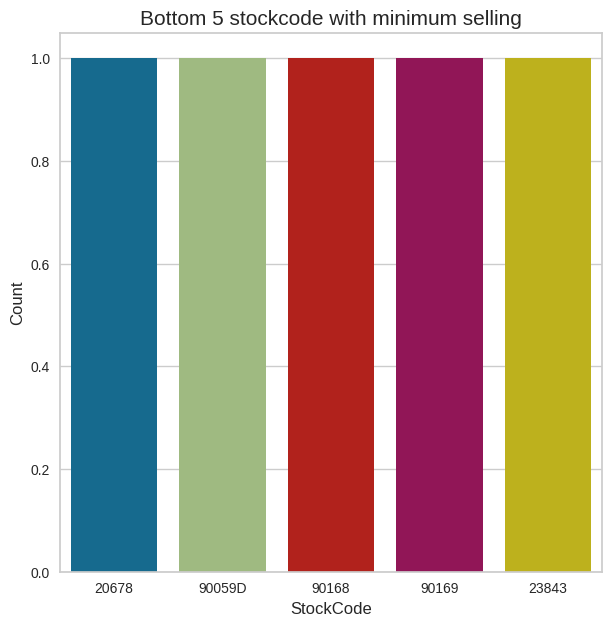

In [49]:
# Creating a Bar plot to display Bottom 5 stockcode name with minimum selling

plt.figure(figsize=(7,7))
sns.barplot(x=Bottom_5_stockcode_name ['StockCode'],y=Bottom_5_stockcode_name ['Count'],data=Bottom_5_stockcode_name )
plt.title('Bottom 5 stockcode with minimum selling',size=15)
plt.xlabel('StockCode',size=12)
plt.ylabel('Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to visualize the Top 5 stockcode with the maximum selling and Bottom 5 stockcode with minimum selling.

##### 2. What is/are the insight(s) found from the chart?

#### --> 85123A, 22423, 85099B, 84879 and 47566 are the stockcode of the products with maximum selling.
#### --> 20678, 90059D, 90168, 90169 and 23843 are the stockcode of products with the minimum selling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights help in creating positive business impact.

#### Chart - 4

In [50]:
# Chart - 4 visualization code

Month_with_max_sell = retail_df['Month'].value_counts().reset_index()
Month_with_max_sell.rename(columns={'index': 'Month','Month': 'Count'}, inplace=True)

In [51]:
Month_with_max_sell

,Month,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


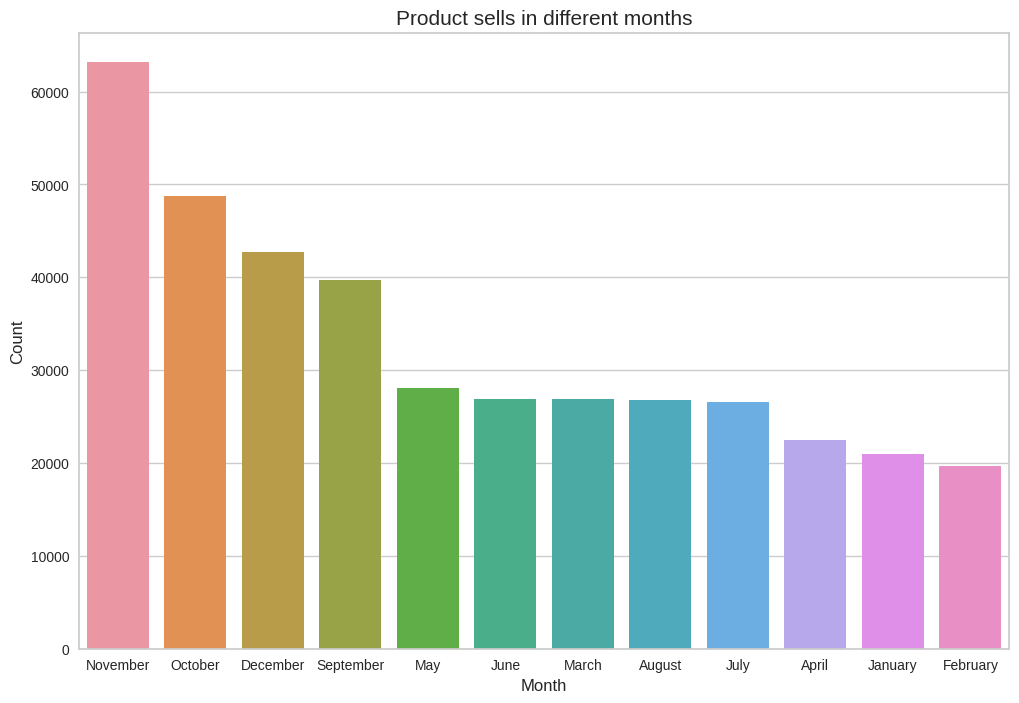

In [52]:
# Creating a Bar plot to visualize the sells of products in different months

plt.figure(figsize=(12,8))
sns.barplot(x=Month_with_max_sell ['Month'],y=Month_with_max_sell ['Count'],data=Month_with_max_sell )
plt.title('Product sells in different months',size=15)
plt.xlabel('Month',size=12)
plt.ylabel('Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to visualize the sells of products in different months.

##### 2. What is/are the insight(s) found from the chart?

#### November, October, December, and September are the months where the highest sells have been observed and there is a slighlty decrease in sells in the month January and Februray.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights helped in creating positive business impact.

#### Chart - 5

In [53]:
# Chart - 5 visualization code

Year_df = retail_df['Year'].value_counts().reset_index()
Year_df.rename(columns={'index': 'Year','Year': 'Count'}, inplace=True)

In [54]:
Year_df

,Year,Count
0,2011,367059
1,2010,25673


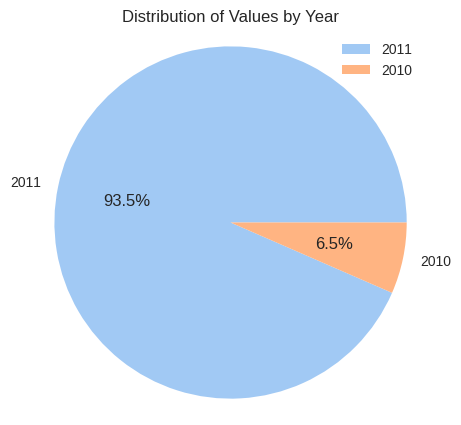

In [55]:
# Create a pie chart using Seaborn

plt.figure(figsize=(5,5))
sns.set_palette("pastel")
plt.pie(Year_df['Count'], labels=Year_df['Year'], autopct='%1.1f%%')
plt.title('Distribution of Values by Year')
plt.legend()
plt.axis('equal')

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to see the distribution of Sells in different years.

##### 2. What is/are the insight(s) found from the chart?

#### Maximum sells have been observed in the year 2011 as compare to 2010.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights help in creating positive business impact.

#### Chart - 6

In [56]:
# Chart - 6 visualization code

In [57]:
Time_of_Day_df = retail_df['Time_of_Day'].value_counts().reset_index()
Time_of_Day_df.rename(columns={'index': 'Time_of_Day','Time_of_Day': 'Count'}, inplace=True)

In [58]:
Time_of_Day_df

,Time_of_Day,Count
0,Afternoon,255738
1,Morning,117144
2,Evening,19850


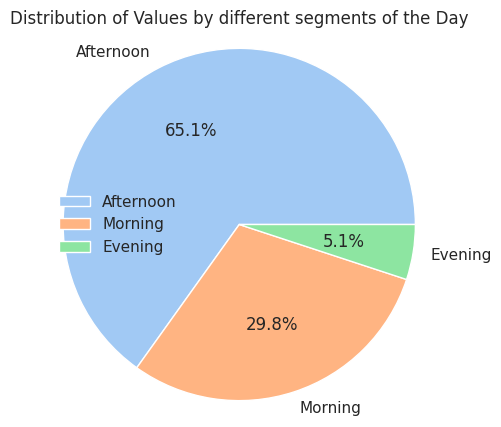

In [126]:
# Create a pie chart using Seaborn
plt.figure(figsize=(5,5))
sns.set_palette("pastel")
plt.pie(Time_of_Day_df['Count'], labels=Time_of_Day_df['Time_of_Day'], autopct='%1.1f%%')
plt.title('Distribution of Values by different segments of the Day')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand the distribution of Sells in different segments of the day.

##### 2. What is/are the insight(s) found from the chart?

#### Maximum sells have been observed in the Afternoon time then slightly decrease in sells in the evening time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight help in creating positive business impact.

#### Chart - 7

In [60]:
# Chart - 7 visualization code

# Creating a bar chart to display the Customer_ID and there respective country who have spend the maximum amount

Highest_purchase_customer = retail_df.groupby(['CustomerID','Country']).agg({'Total_Price':'max'}).reset_index().sort_values(['Total_Price'],ascending=False).head(10)

In [61]:
Highest_purchase_customer

,CustomerID,Country,Total_Price
3017,16446.0,United Kingdom,168469.60
0,12346.0,United Kingdom,77183.60
2020,15098.0,United Kingdom,38970.00
2711,16029.0,United Kingdom,8142.75
3737,17450.0,United Kingdom,7144.72
2511,15749.0,United Kingdom,6539.40
1698,14646.0,Netherlands,4992.00
4102,17949.0,United Kingdom,4401.00
461,12931.0,United Kingdom,4176.00
160,12536.0,France,4161.06


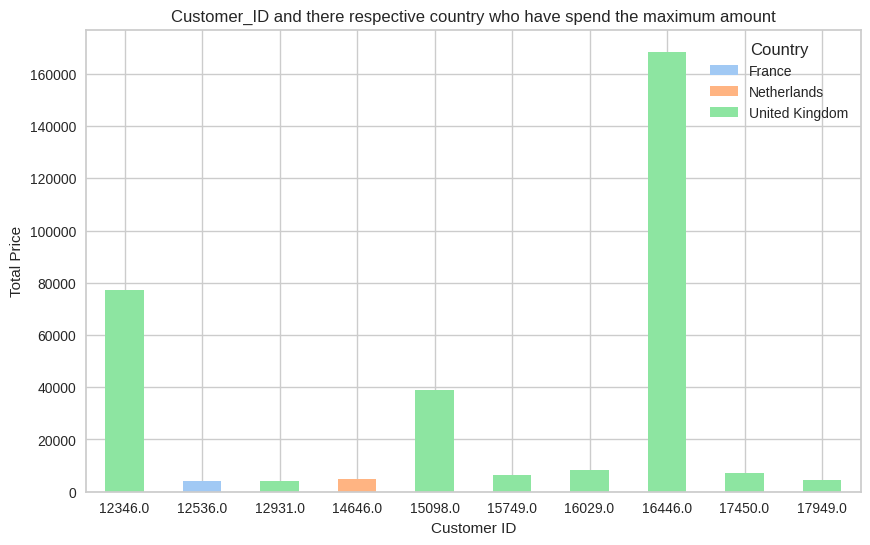

In [62]:
# Pivot the data to prepare for unstacked bar chart
pivot_df = Highest_purchase_customer.pivot(index='CustomerID', columns='Country', values='Total_Price')

# Create an unstacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Price')
plt.title('Customer_ID and there respective country who have spend the maximum amount')
plt.legend(title='Country')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

#### I havve picked the specific chart to understand the Customer_ID and there respective country who have spend the maximum amount.


##### 2. What is/are the insight(s) found from the chart?

#### Customer_ID 16446 spend the most amount and comes from United Kingdom most of the customers from United Kingdom spend the maximum amount then from france and Netherlands.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight helped in creating positive business impact.

#### Chart - 8

In [63]:
# Chart - 8 visualization code

# Creating a plot to display the Products whose price is maximum and there respective StockCode

Description_df = retail_df.groupby(['StockCode','Description']).agg({'UnitPrice':'max'}).reset_index().sort_values(['UnitPrice'],ascending=False).head()

In [64]:
Description_df

,StockCode,Description,UnitPrice
3896,POST,POSTAGE,8142.75
3894,M,Manual,4161.06
3893,DOT,DOTCOM POSTAGE,1599.26
1320,22502,PICNIC BASKET WICKER 60 PIECES,649.50
1471,22655,VINTAGE RED KITCHEN CABINET,295.00


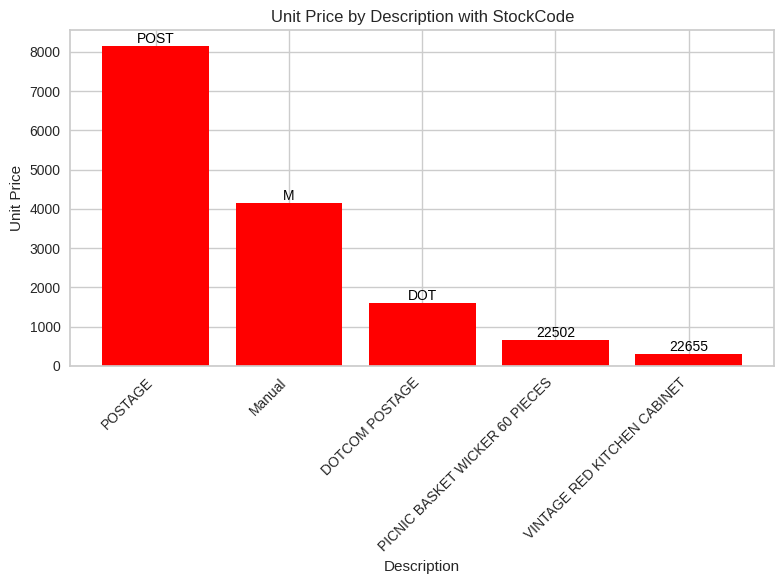

In [65]:
# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(Description_df['Description'], Description_df['UnitPrice'], color='red')

# Add StockCode as labels on top of the bars
for bar, stock_code in zip(bars, Description_df['StockCode']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(stock_code),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Description')
plt.ylabel('Unit Price')
plt.title('Unit Price by Description with StockCode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand to display the Products whose price is maximum and there respective StockCode.


##### 2. What is/are the insight(s) found from the chart?

#### Postage, Manual, DOTCOM POSTAGE, PICNIC BASKET WICKER 60 PIECES and VINTAGE RED KITCHEN CABINET are the products available in the store whose price is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights help in creating positive business impact.

#### Chart - 9

In [66]:
# Chart - 9 visualization code

In [67]:
Hour_df = retail_df['Hour'].value_counts().reset_index()
Hour_df.rename(columns={'index':'Hour','Hour':'Count'}, inplace=True)


In [68]:
Hour_df

,Hour,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


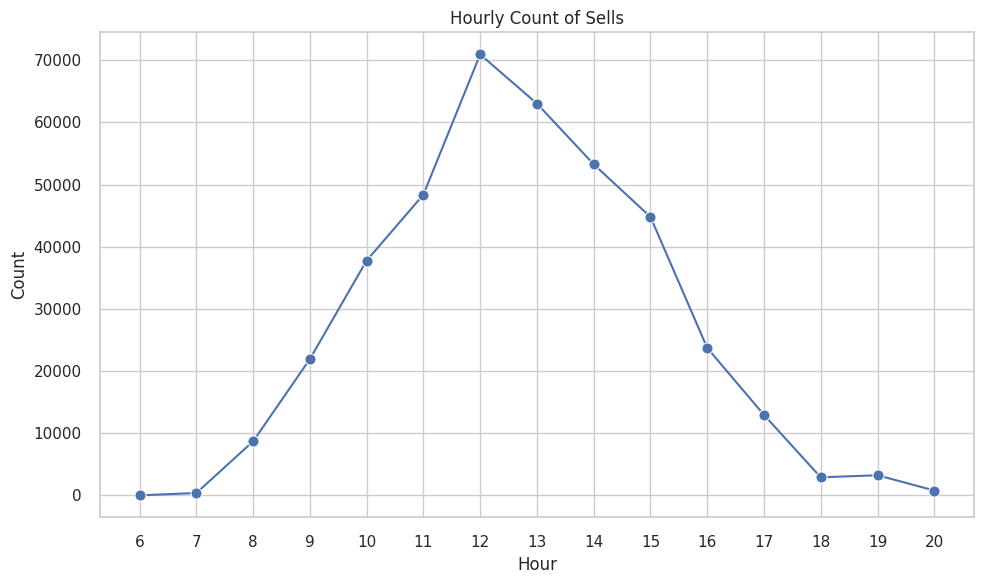

In [128]:
# Create the line plot using Seaborn

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=Hour_df, x='Hour', y='Count', marker='o', markersize=8, color='b')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Count of Sells')
plt.xticks(Hour_df['Hour'])
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific line plot to understand the sells in different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

#### Maximum sells have been observed between 11:00 AM to 3:00 PM in the afternoon time then seen slighlty decrease in the sells.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight help in creating positive business impact.

#### Chart - 10

In [70]:
# Chart - 10 visualization code

# Creating a bar plot to understand sells of product in different days of the Week.

Weekly_df = retail_df['Day'].value_counts().reset_index()
Weekly_df.rename(columns={'index':'Day','Day':'Count'}, inplace=True)

In [71]:
Weekly_df

,Day,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


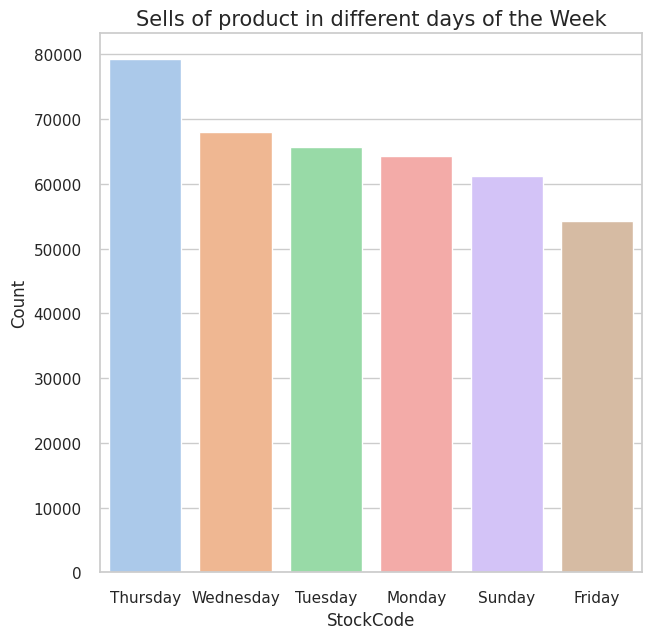

In [127]:
# Creating a Bar plot to display Top 5 countries with maximum number of customers

plt.figure(figsize=(7,7))
sns.barplot(x=Weekly_df['Day'],y=Weekly_df['Count'],data=Weekly_df)
plt.title('Sells of product in different days of the Week',size=15)
plt.xlabel('StockCode',size=12)
plt.ylabel('Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific bar plot to understand the sells of product in different days of the Week.

##### 2. What is/are the insight(s) found from the chart?

#### Maximum sells have been observed on Thursday and Wednesday and then after seen slightly decrease in the sells.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight help in creating positive business impact.

#### Chart - 11

In [73]:
# Creating a plot to understand about the Products that genreated the most number of revenue

Total_revenue_product_wise = retail_df.groupby('Description').agg({'Total_Price':'sum'}).reset_index().sort_values(by='Total_Price',ascending=False)

In [74]:
Total_revenue_product_wise

,Description,Total_Price
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.600
2767,REGENCY CAKESTAND 3 TIER,142264.750
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.100
1762,JUMBO BAG RED RETROSPOT,85040.540
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.730
...,...,...
2639,PURPLE FRANGIPANI HAIRCLIP,0.850
3556,VINTAGE BLUE TINSEL REEL,0.840
2933,SET 12 COLOURING PENCILS DOILEY,0.650
1628,HEN HOUSE W CHICK IN NEST,0.420


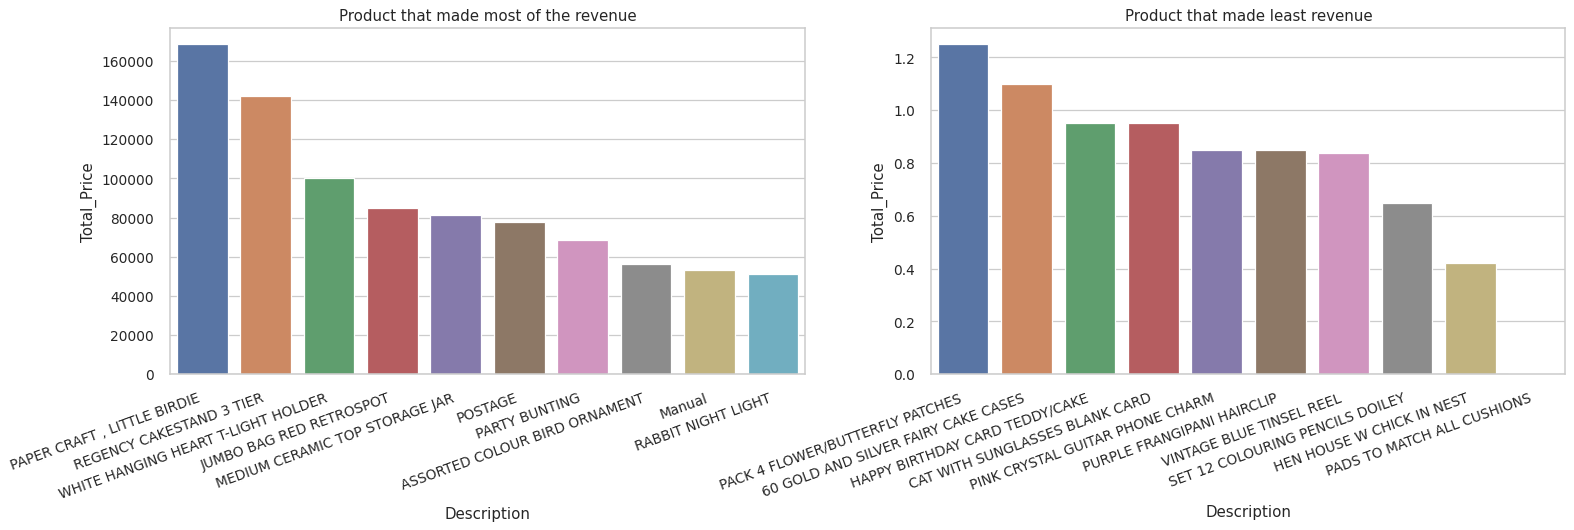

In [75]:
# Visualizing top and bottom 10 products based on amount

plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=Total_revenue_product_wise.head(10),x="Description",y="Total_Price")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=Total_revenue_product_wise.tail(10),x="Description",y="Total_Price")
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand about those products who generated the maximum and minimum revenue.

##### 2. What is/are the insight(s) found from the chart?

#### PAPER CRAFT, LITTLE BIRDIE generated the maximum revenue while PADS TO MATCH ALL CUSHIONS generated the minimum revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights help in creating positive business impact.

#### Chart - 12

In [76]:
# Chart - 12 visualization code

# Creating a plot to understand about the products that have been sold in maximum and minimum number of quantity

Product_max_quantity = retail_df.groupby(['Description']).agg({'Quantity':'sum'}).reset_index().sort_values(['Quantity'],ascending=False).head(20)

In [77]:
Product_max_quantity

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706
216,ASSORTED COLOUR BIRD ORNAMENT,35263
2269,PACK OF 72 RETROSPOT CAKE CASES,33670
2600,POPCORN HOLDER,30919
2656,RABBIT NIGHT LIGHT,27153
2047,MINI PAINT SET VINTAGE,26076


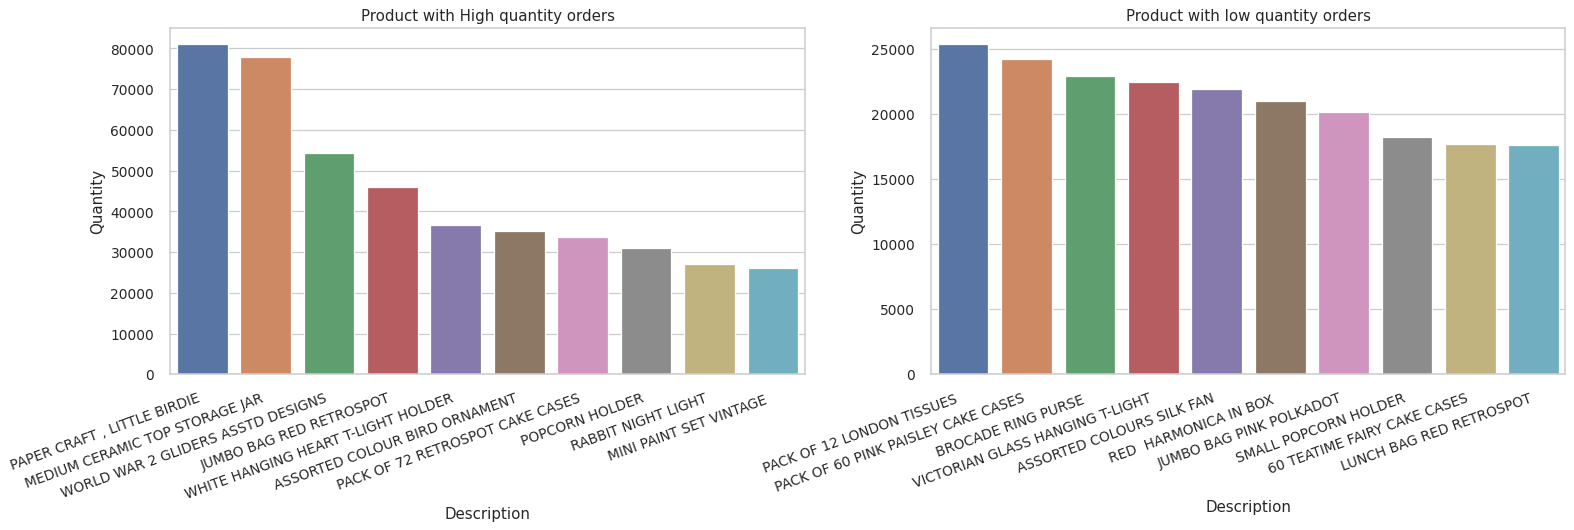

In [129]:
# Visualizing top and bottom 10 products based on purchase quantity

plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=Product_max_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=Product_max_quantity.tail(10),x="Description",y="Quantity")
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand about the products that have been sold in Maximum and minimum number of quantity.

##### 2. What is/are the insight(s) found from the chart?

#### I got insights about the products that haveen sold in maximum and minimum numer of quantity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insights help in creating positive business impact.

#### Chart - 13

In [79]:
# Chart - 13 visualization code

#  Creating a plot to understand about those Customers who make most frequent purchases

customer_freq_purchases = retail_df.groupby(['CustomerID','Country']).agg({'InvoiceNo':'count'}).reset_index().sort_values(['InvoiceNo'],ascending=False).head(10)

In [80]:
customer_freq_purchases

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677
2185,15311.0,United Kingdom,2366
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1814
699,13263.0,United Kingdom,1667
1443,14298.0,United Kingdom,1637


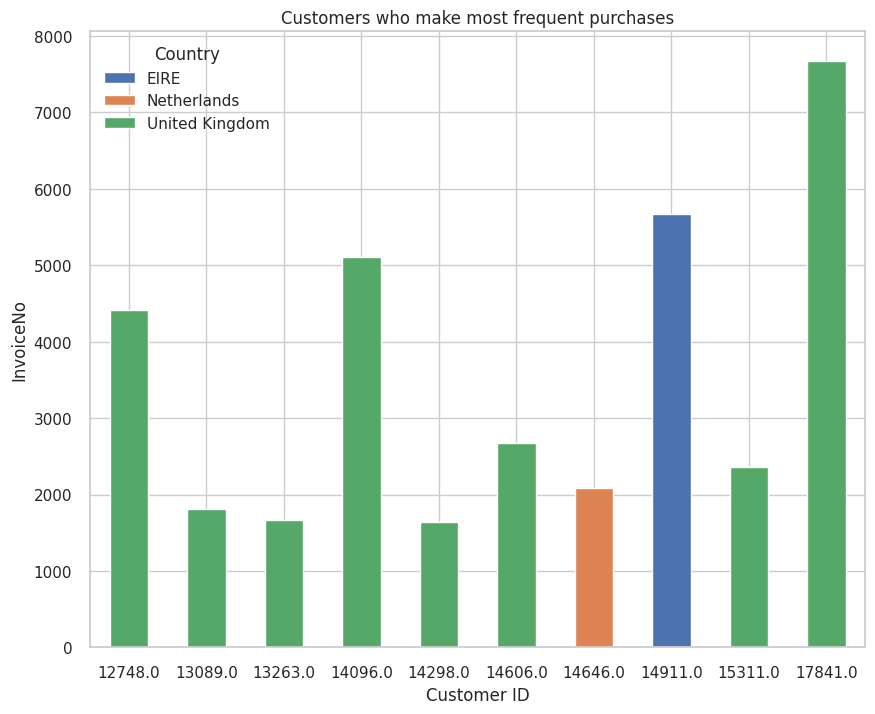

In [81]:
# Pivot the data to prepare for unstacked bar chart
pivot_df = customer_freq_purchases.pivot(index='CustomerID', columns='Country', values='InvoiceNo')

# Create an unstacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Customer ID')
plt.ylabel('InvoiceNo')
plt.title('Customers who make most frequent purchases')
plt.legend(title='Country')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand about Customers who make most frequent purchases and they belong from which country.

##### 2. What is/are the insight(s) found from the chart?

#### Customer_ID 17841 make the most frequent purchases and belong from United Kingdom and the other customer whose customer_ID is 14991 is belong from EIRE.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight help in creating positive business impact.

## ***5. RFM Modelling***

#### RFM modeling quantifies customer behavior by analyzing three key factors: Recency (time since last purchase), Frequency (number of purchases), and Monetary (total spending). This approach categorizes customers into segments based on their RFM scores, enabling businesses to identify distinct patterns, preferences, and engagement levels, leading to targeted strategies for improved customer engagement and retention.

In [82]:
# Importing the datetime module

import datetime as dt

#### Recency = Latest Date - Last Invoice Date
#### Frequency = Count of Invoice number
#### Monetary Value = Total Amount spent by customer(Sum Total Amount)

In [83]:
# Checking the Latest data in the dataset

retail_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [84]:
#Setting the Latest date 2011-12-10 as last invoice date because last invoice date was 2011-12-09 to calculate the number of days from recent purchase

Latest_Date = dt.datetime(2011,12,10)

In [85]:
#Create RFM Modelling scores for each customer

rfm_model_df = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Price': lambda x: x.sum()})

In [86]:
#Converting the dtype of Invoice Date from Datetime to int

rfm_model_df['InvoiceDate'] = rfm_model_df['InvoiceDate'].astype(int)

In [87]:
#Rename column names to Recency, Frequency and Monetary

rfm_model_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_Price': 'Monetary'}, inplace=True)

In [88]:
rfm_model_df.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,721,2045.53


In [89]:
rfm_model_df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [90]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles

In [91]:
#Split into four segments using quantiles

quantiles = rfm_model_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [92]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [93]:
#Functions to create R, F and M segments

def Recency_scoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def Frequency_scoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def Monetary_scoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [94]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

rfm_model_df['R'] = rfm_model_df['Recency'].apply(Recency_scoring, args=('Recency',quantiles,))
rfm_model_df['F'] = rfm_model_df['Frequency'].apply(Frequency_scoring, args=('Frequency',quantiles,))
rfm_model_df['M'] = rfm_model_df['Monetary'].apply(Monetary_scoring, args=('Monetary',quantiles,))

In [95]:
rfm_model_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [96]:
# Finding the RFM Group for each customer by combining the factors R,Fand M

rfm_model_df['RFM'] = 100*rfm_model_df['R'] + 10*rfm_model_df['F'] + rfm_model_df['M']

In [97]:
# Finding the RFM Score for each customer by adding the factors R,Fand M

rfm_model_df['RFM_Score'] = rfm_model_df['R'] + rfm_model_df['F'] + rfm_model_df['M']

In [98]:
rfm_model_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


**Best Customer**:

##### 1. RFM 111 indicates an ideal customer profile.
##### 2. This customer has recently made a purchase (good Recency), buys frequently (high Frequency), and spends generously (high Monetary).
##### 3. Such customers are considered the best as they actively engage and contribute to revenue.

**Churning Customer**:

##### 1. An RFM of 444 represents a concerning customer behavior pattern.
##### 2. The Recency, Frequency, and Monetary factors are all low, implying a lack of recent transactions, infrequent purchases, and low spending.
##### 3.This combination suggests a potential churning customer who may be disengaging from the business.

#### The RFM framework allows creating numerous segments by combining different R, F, and M values.These segments help categorize customers based on their engagement levels, buying patterns, and spending habits.

In [99]:
RFM_score_df = rfm_model_df['RFM_Score'].value_counts().reset_index()
RFM_score_df.rename(columns={'index': 'RFM_Score','RFM_Score': 'No of Customers'}, inplace=True)

In [100]:
RFM_score_df

,RFM_Score,No of Customers
0,10,519
1,9,461
2,7,459
3,8,457
4,3,443
5,5,428
6,6,410
7,11,391
8,4,390
9,12,381


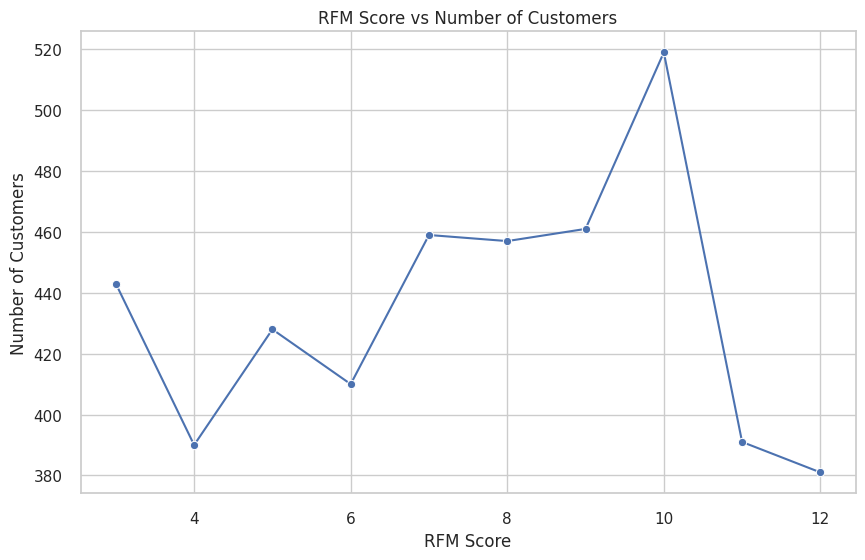

In [101]:
# Create the line plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="RFM_Score", y="No of Customers", data=RFM_score_df, marker='o')

# Adding title and labels
plt.title('RFM Score vs Number of Customers')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


#### **1. Targeting Customers with Lower RFM Scores (3-6):**
##### These customers exhibit behaviors that align with a strong potential for continued engagement and profitability. They are the ones who have visited recently, made purchases at a satisfactory frequency, and have spent a notable amount of money.

#### **2. Identifying Mediocre Customers with RFM Scores (6-10):**
##### Within the spectrum of customer RFM scores, there lies a segment ranging from 6 to 10, representing a group of customers with average engagement levels. While not as dynamic as the lower RFM segment, these customers still hold potential. Employing targeted marketing initiatives and personalized experiences can elevate their engagement, transforming them into more valuable customers over time.

#### **3. Engaging Customers with Higher RFM Scores (10-12):**
##### Customers falling within the RFM score range of 10 to 12 demand a distinct focus. This segment potentially comprises customers who were previously valuable but are now slipping away. Swift action is crucial to rekindle their interest and regain their loyalty.

In [102]:
#Handle negative and zero values so as to handle infinite numbers during log transformation

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [103]:
#Apply handle_neg_n_zero function to Recency,Frequency and Monetary columns

rfm_model_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_model_df.Recency]
rfm_model_df['Frequency'] = [handle_neg_n_zero(x) for x in rfm_model_df.Frequency]
rfm_model_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_model_df.Monetary]

In [104]:
from sklearn import preprocessing
rfm_model_df['Recency_log'] = rfm_model_df['Recency'].apply(math.log)
rfm_model_df['Frequency_log'] = rfm_model_df['Frequency'].apply(math.log)
rfm_model_df['Monetary_log'] = rfm_model_df['Monetary'].apply(math.log)

In [105]:
rfm_model_df

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,5.624018,2.302585,5.196285
18281.0,180,7,80.82,4,4,4,444,12,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1,4,4,144,9,1.945910,2.484907,5.182064


In [106]:
# Checking Descriptive summary

rfm_model_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_log,Frequency_log,Monetary_log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.049551,90.512100,2048.216154,2.493893,2.512330,2.500115,277.012676,7.506338,3.736880,3.670868,6.584187
std,100.000372,225.515328,8984.248299,1.122159,1.122724,1.118266,118.418077,2.814398,1.474527,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,17.000000,17.000000,306.455000,1.000000,2.000000,1.500000,144.000000,5.000000,2.833213,2.833213,5.725071
50%,50.000000,41.000000,668.560000,2.000000,3.000000,3.000000,244.000000,8.000000,3.912023,3.713572,6.505126
75%,141.500000,98.000000,1660.315000,3.500000,4.000000,3.500000,377.500000,10.000000,4.952293,4.584967,7.414763
max,373.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,5.921578,8.945854,12.543280


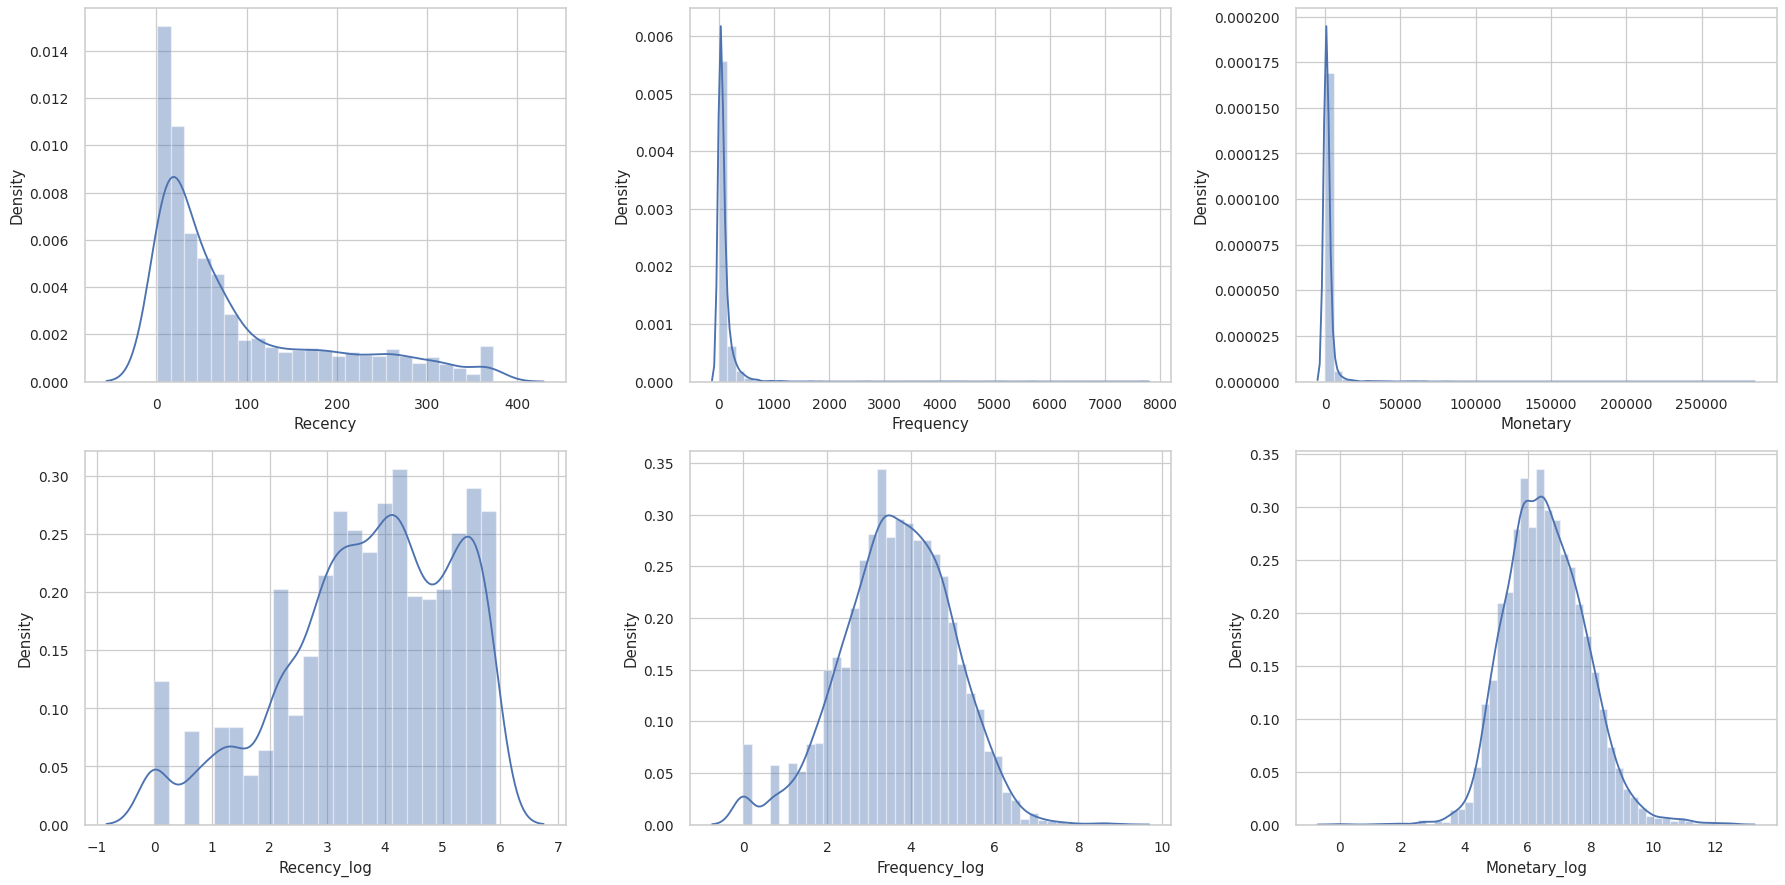

In [107]:
# Visualizing the distributions before and after log transformation.

target = ['Recency', 'Frequency',	'Monetary', 'Recency_log', 'Frequency_log', 'Monetary_log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm_model_df[col])
  plt.tight_layout()

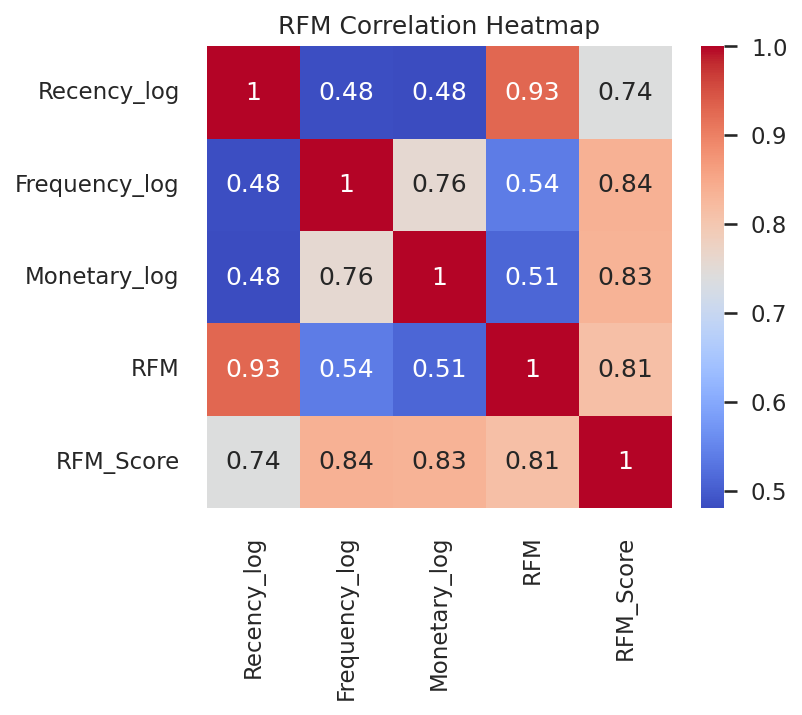

In [108]:
# Visualizing the correlations among features.

target = ['Recency_log','Frequency_log','Monetary_log','RFM','RFM_Score']
plt.figure(figsize = (5,4), dpi=150)
sns.heatmap(abs(rfm_model_df[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

In [109]:
# Defining X Variables

X = rfm_model_df[['Recency_log','Frequency_log','Monetary_log']]

In [110]:
# Initializing an empty dictionary to store the stats and summary for all clusters
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

In [111]:
# Standard Scaler

X = StandardScaler().fit_transform(X)

In [112]:
# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  # Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

In [113]:
# Defining a function for plotting clusters for Visualization

def plots_stats_summary(y, segment_name, er,title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm_model_df[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm_model_df[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm_model_df,segment_name)
  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend
  plt.show()


  # PART 2 : # Displaying the stats and summary

  # Displaying the mean median and count of Recency, Frequency and Monetary for each group

  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap=er))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap=er))

  return stats, summary

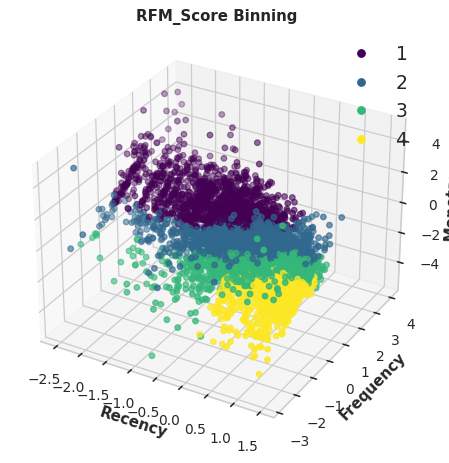



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



Binning,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,19.575734,12.000000,225.906423,146.000000,5253.556788,2511.690000,1261
2,63.405732,43.000000,56.989442,48.000000,1162.341713,794.880000,1326
3,125.169388,87.500000,24.321429,22.000000,579.140767,364.650000,980
4,217.585492,221.000000,10.959845,10.000000,199.030725,179.050000,772


Binning,Last_visited,Purchase_frequency,Money_spent
1,4 to 28 days ago,Bought 100 to 251 times,Spent around 1595 to 4206 Sterling
2,22 to 81 days ago,Bought 31 to 72 times,Spent around 528 to 1220 Sterling
3,45 to 196 days ago,Bought 12 to 31 times,Spent around 231 to 519 Sterling
4,149 to 289 days ago,Bought 5 to 14 times,Spent around 119 to 258 Sterling


In [114]:
# Splitting RFM_Score in 4 bins based on quantiles

y = pd.qcut(rfm_model_df['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization

title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
color='Oranges'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## ***6. ML Model Implementation***

##**K-means Clustering**

#### K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping data points based on their similarity. It is a partition-based clustering method that aims to partition a dataset into K clusters, where K is a predefined number.

In [115]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,15))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))

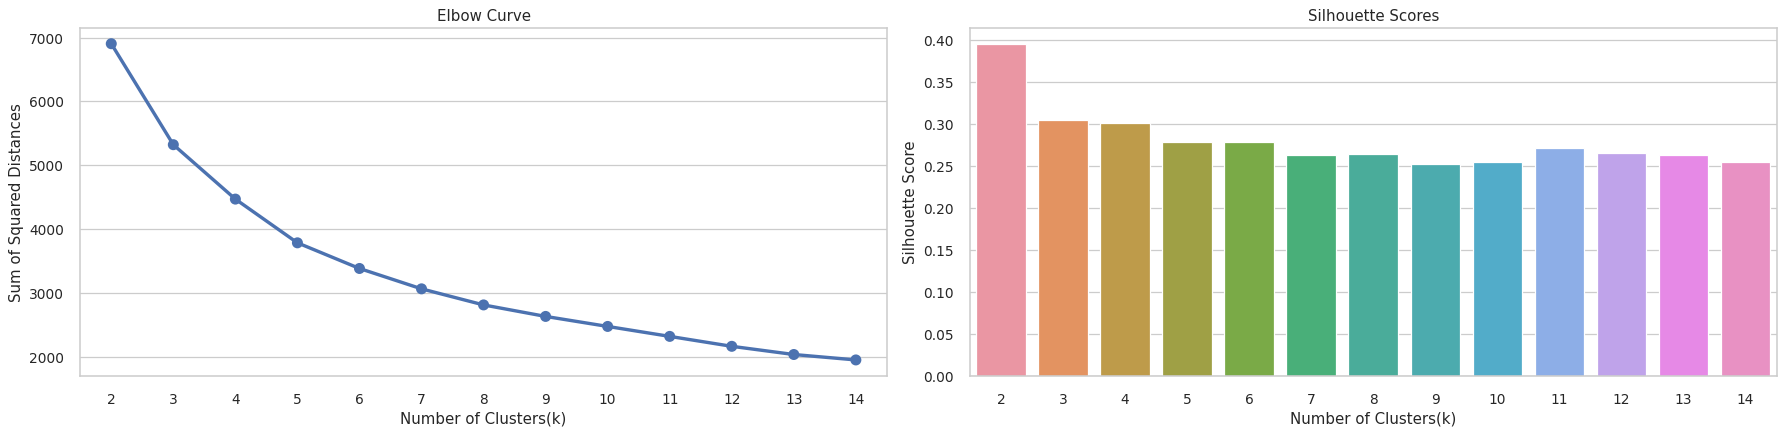

In [116]:
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

#### **Observations**

#### 1. The elbow curve analysis suggests 5 clusters as the optimal choice, but considering objectives, 4 or 6 clusters could also be considered.
#### 2. Alternatively, focusing on maximum Silhouette Score suggests 2 clusters.
#### 3. By combining both approaches, the optimal number of clusters appears to be 4. This choice maintains a satisfactory Silhouette score and aligns well with the elbow curve's inflection point.

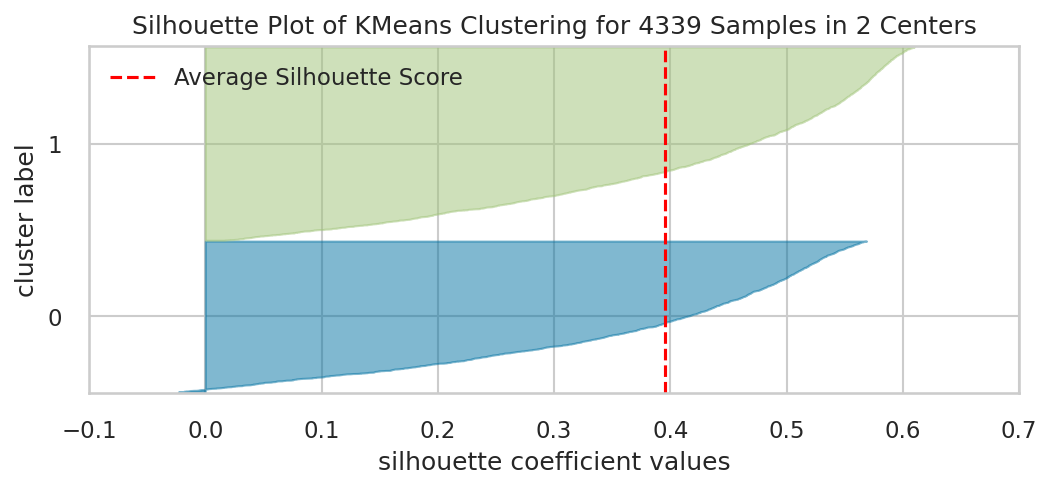

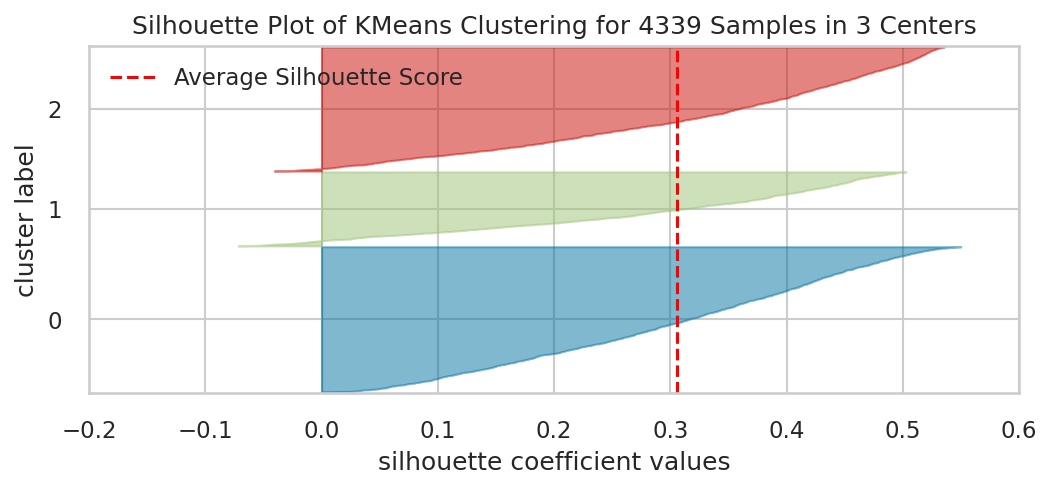

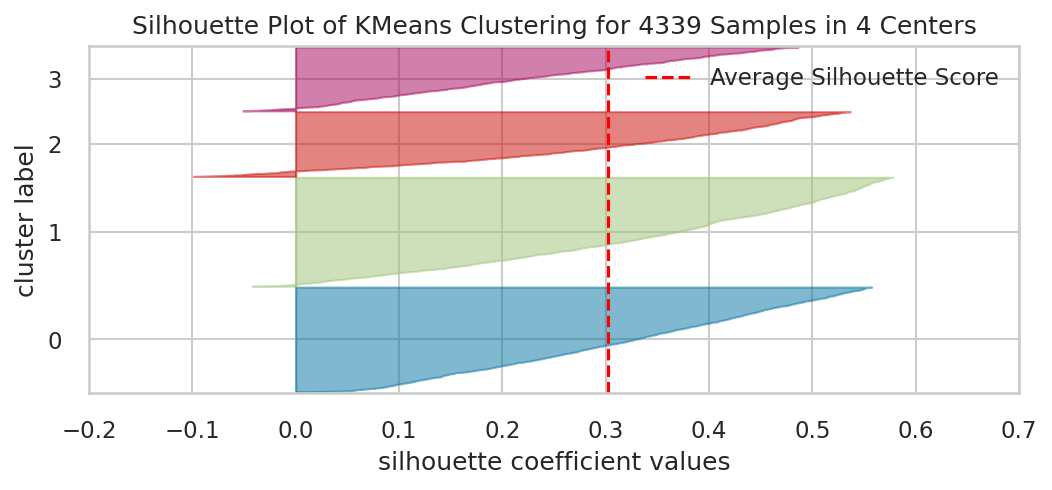

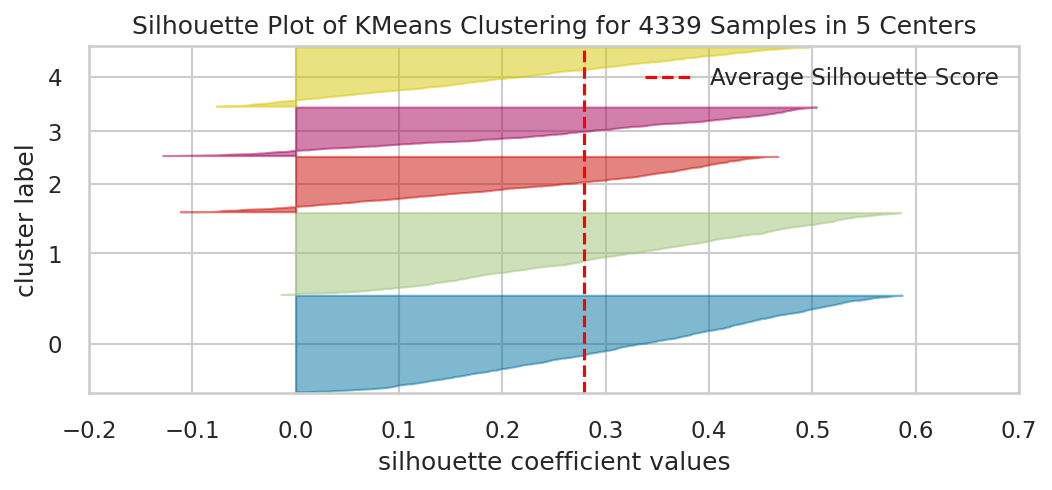

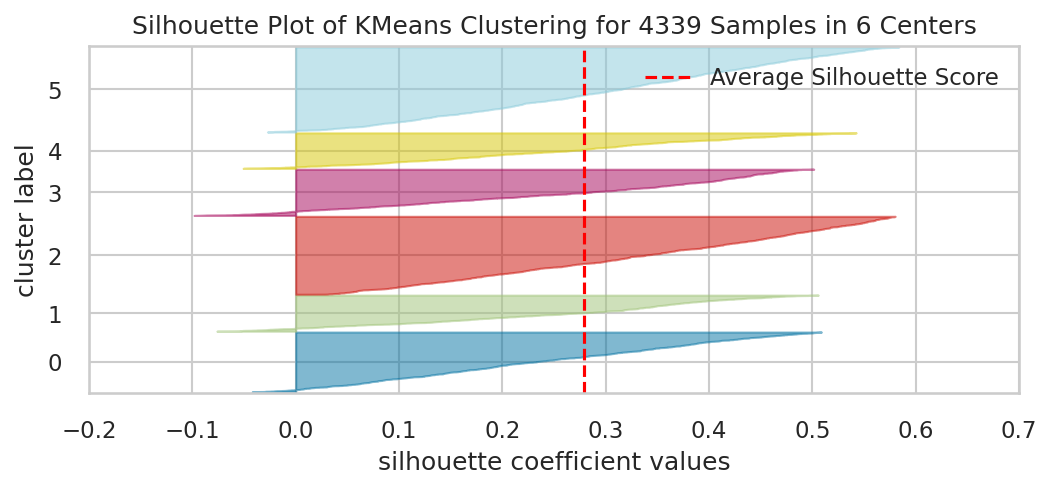

In [117]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

#### The silhoute score is highest for the optimal number of cluster = 2.

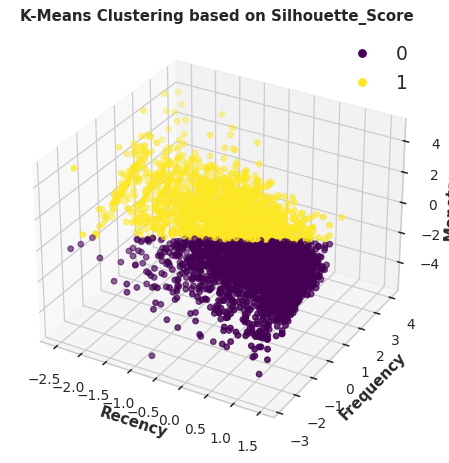



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,140.355090,108.000000,25.085386,20.000000,473.235337,333.280000,2436
1,30.214398,18.000000,174.263794,109.000000,4064.324021,1838.850000,1903


K-Means|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,50 to 225 days ago,Bought 10 to 34 times,Spent around 190 to 574 Sterling
1,7 to 37 days ago,Bought 67 to 192 times,Spent around 1071 to 3407 Sterling


In [118]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
color="Blues"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

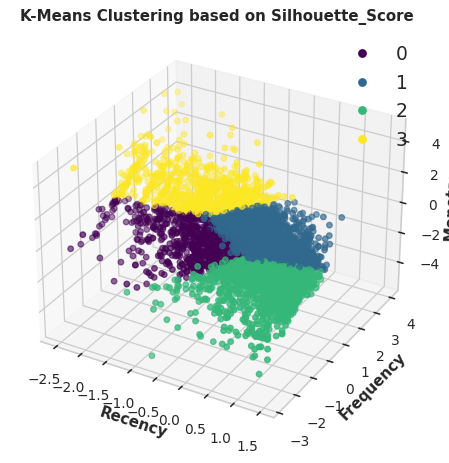



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|4Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,18.727950,17.000000,37.701863,32.000000,592.280994,468.410000,805
1,90.124531,66.000000,81.568642,68.000000,1537.601075,1100.900000,1333
2,182.954122,183.000000,14.911828,13.000000,296.725284,240.890000,1395
3,11.129032,8.000000,288.894541,196.000000,7378.250236,3411.890000,806


K-Means|4Cluster,Last_visited,Purchase_frequency,Money_spent
0,9 to 26 days ago,Bought 19 to 50 times,Spent around 293 to 739 Sterling
1,40 to 114 days ago,Bought 43 to 104 times,Spent around 714 to 1737 Sterling
2,80 to 267 days ago,Bought 7 to 21 times,Spent around 144 to 371 Sterling
3,3 to 16 days ago,Bought 123 to 314 times,Spent around 2082 to 5720 Sterling


In [119]:
# Fitting the model on n_clusters = 4 based on Elbow curve to visualise the segments.

kmc = KMeans(n_clusters=4,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.1
color="Blues"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

##**2. Hierarchical Clustering**

#### Hierarchical clustering is a method of organizing data into a tree-like structure, called a "dendrogram," to reveal patterns of similarity and dissimilarity between data points. It's like creating a family tree of your data, where similar items are grouped together based on their likeness.

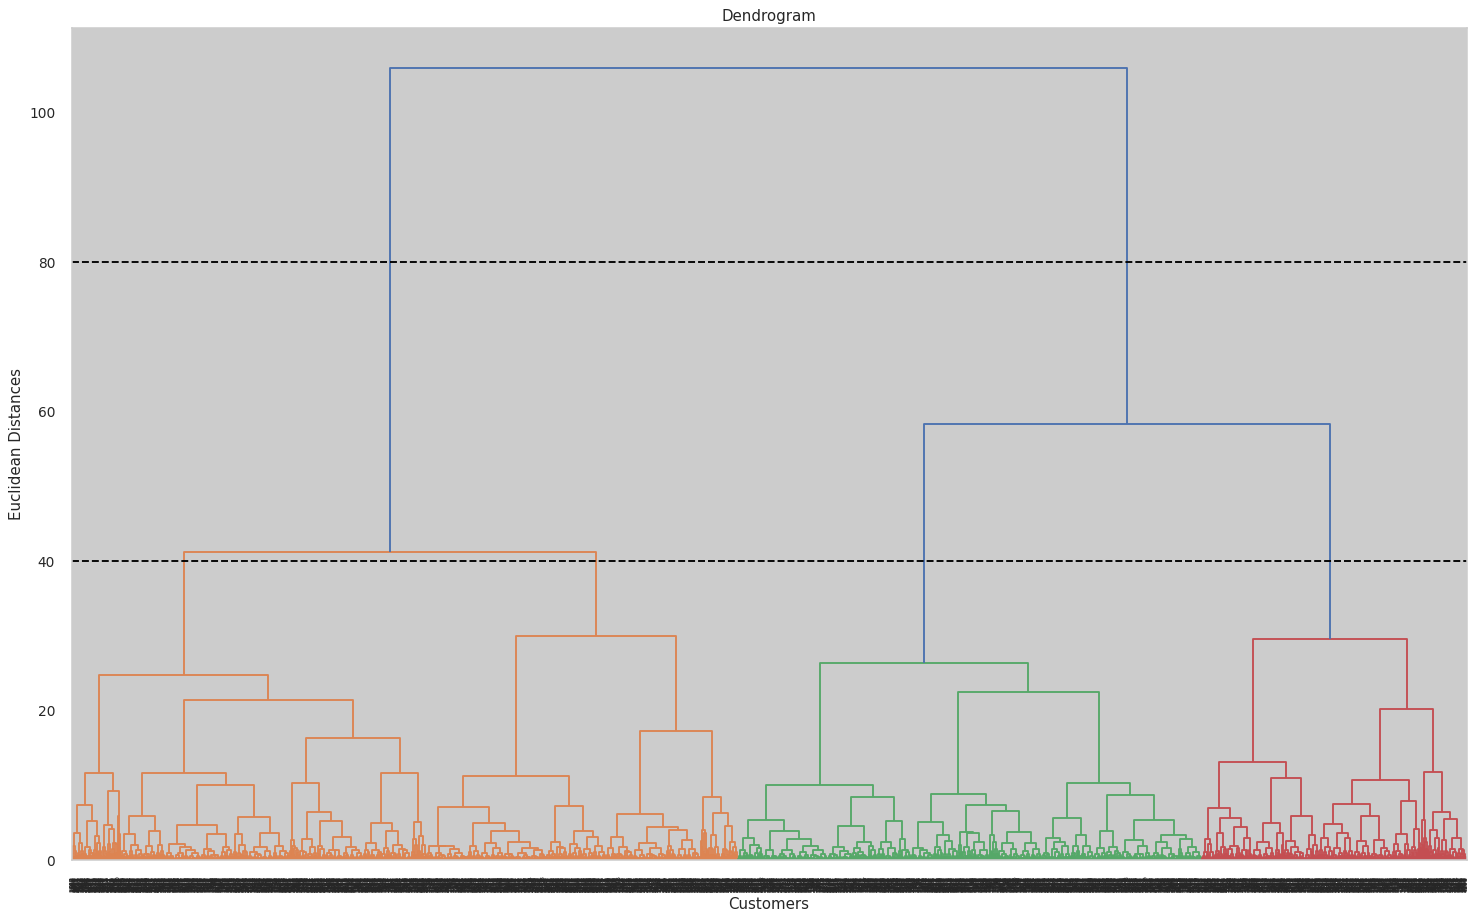

In [120]:
# Using the Dendogram to Decide the number of clusters

plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=80, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=40, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

**Observations**
#### 1. To determine clusters in hierarchical clustering, a threshold distance is defined. This threshold is often placed at the height where the tallest vertical line is intersected on the dendrogram. Setting it around 40 or 80 can be effective.

#### 2. The number of clusters is derived from the intersection of the drawn horizontal line with the vertical lines on the dendrogram. Using a higher threshold like 80 results in 2 clusters, while a lower threshold like 40 results in 3 clusters. This approach provides a practical way to determine the desired level of clustering.

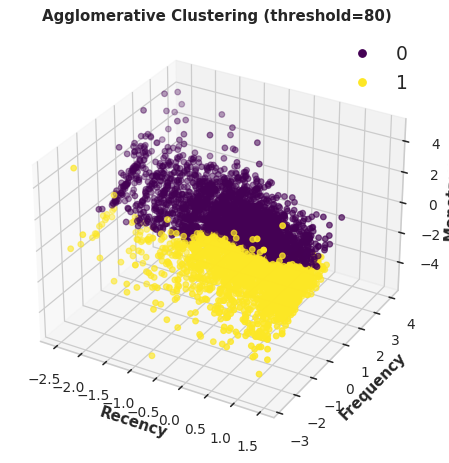



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



hierarchical|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,48.522296,25.000000,155.105960,95.000000,3434.244540,1531.620000,2265
1,139.585342,102.000000,19.969624,16.000000,534.544847,300.390000,2074


hierarchical|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,9 to 65 days ago,Bought 54 to 166 times,Spent around 891 to 2863 Sterling
1,39 to 237 days ago,Bought 9 to 27 times,Spent around 171 to 439 Sterling


In [121]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 80

ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=80)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
color="Blues_r"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

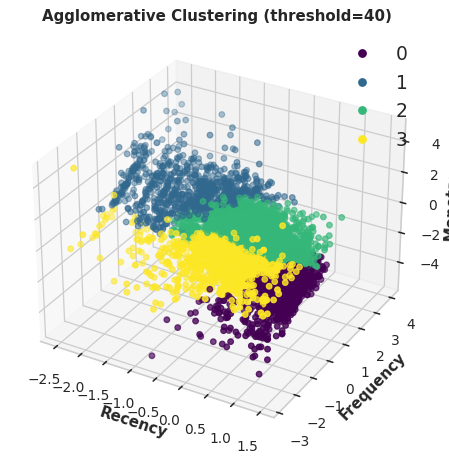



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



hierarchical|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,234.597938,239.000000,18.971134,14.000000,251.927866,222.805000,970
1,9.063183,7.000000,274.784933,186.000000,6791.309465,3023.080000,823
2,71.042996,50.000000,86.800971,71.000000,1518.249786,1135.335000,1442
3,56.105072,43.000000,20.846920,18.000000,782.858679,357.490000,1104


hierarchical|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,173 to 297 days ago,Bought 8 to 24 times,Spent around 136 to 337 Sterling
1,3 to 12 days ago,Bought 103 to 310 times,Spent around 1711 to 5490 Sterling
2,25 to 91 days ago,Bought 47 to 110 times,Spent around 776 to 1823 Sterling
3,22 to 72 days ago,Bought 10 to 28 times,Spent around 223 to 539 Sterling


In [122]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 40

ahc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 4
title = 'Agglomerative Clustering (threshold=40)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
color="Blues_r"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

##**3. DBScan Clustering**

#### DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm that groups data points based on their density in a way that naturally finds clusters of varying shapes and handles noise.

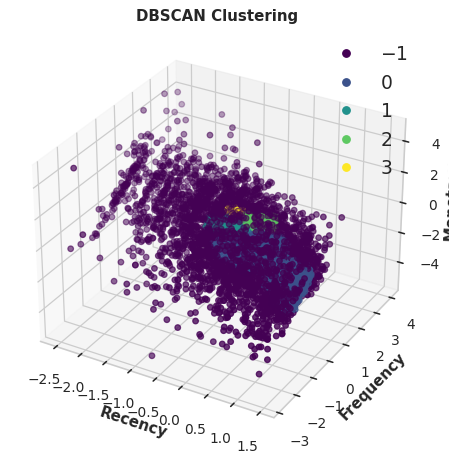



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



DBSCAN,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
-1,75.556762,31.000000,111.785127,51.000000,2606.060747,778.000000,3039
0,154.735977,125.500000,28.562863,25.000000,516.779916,450.445000,1034
1,25.317241,25.000000,70.765517,68.000000,1234.432690,1198.230000,145
2,56.428571,56.000000,106.979592,105.500000,2024.019490,1887.995000,98
3,25.565217,25.000000,119.043478,117.000000,2421.486957,2527.920000,23


DBSCAN,Last_visited,Purchase_frequency,Money_spent
-1,10 to 106 days ago,Bought 15 to 131 times,Spent around 276 to 2198 Sterling
0,65 to 244 days ago,Bought 17 to 37 times,Spent around 308 to 663 Sterling
1,21 to 30 days ago,Bought 60 to 79 times,Spent around 1048 to 1415 Sterling
2,46 to 64 days ago,Bought 92 to 117 times,Spent around 1703 to 2301 Sterling
3,23 to 28 days ago,Bought 109 to 127 times,Spent around 2153 to 2610 Sterling


In [123]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
color="YlGnBu"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

**Observations**
#### 1. DBSCAN is an alternative to KMeans and hierarchical clustering. Unlike those methods, it doesn't need the number of clusters to be specified beforehand. Instead, it links neighboring points to form clusters.
#### 2. DBSCAN excels at handling outliers and identifying nested clusters. Even when the data lacks obvious visible patterns, it can still identify clusters effectively based on defined hyperparameters.

In [124]:
# Summarizing the results obtained by clustering using various methods

summary = pd.DataFrame({"Clusterer": ['Binning',"K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'Elbow Curve', 'Silhouette Score',
                                      'Dendogram (y=80)', 'Dendogram (y=40)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,2,2,4,5]},
                        index=['', '', '', '', '', ''])
summary.T

,,,,,,
Clusterer,Binning,K-Means,K-Means,Agglomerative,Agglomerative,DBSCAN
Criterion,RFM Score Binning,Elbow Curve,Silhouette Score,Dendogram (y=80),Dendogram (y=40),"eps=0.2, min_samples=25"
Segments,4,4,2,2,4,5


# **Conclusion**

**1. Exploratory Data Analysis (EDA) Insights:**


*   Top-selling products include WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG REDRETROSPOT, ASSORTED COLOUR BIRD ORNAMENT, and PARTY BUNTING.

*   Least-selling products consist of GREEN WITH METAL BAG CHARM, WHITE WITH METAL BAG CHARM, BLUE/NAT SHELL NECKLACE W PENDANT, PINK EASTER HENS+FLOWER, PAPER CRAFT, and LITTLE BIRDIE.

*   The leading countries for maximum purchases are United Kingdom, Germany, France, EIRE, and Spain, while Lithuania, Brazil, Czech Republic, Bahrain, and Saudi Arabia record the fewest purchases.
*   Peak sales months are November, October, December, and September, with a slight dip in January and February.

*   Higher sales were observed in 2011 compared to 2010.
*   Afternoon sees the highest sales activity, followed by a slight decrease in the evening.

*   Customer_ID 16446 from the United Kingdom is the top spender, followed by customers from France and Netherlands.
*   Highest-priced products include Postage, Manual, DOTCOM POSTAGE, PICNIC BASKET WICKER 60 PIECES, and VINTAGE RED KITCHEN CABINET.

*   Maximum sales occur between 11:00 AM to 3:00 PM.
*   Thursdays and Wednesdays observe the highest sales, followed by a slight decline.
* There are no transactions happened on Saturday So, This might be the case that Store is Closed on Saturday's.

**2. RFM Model Insights:**


*   Best customers exhibit RFM 111, representing good Recency, high Frequency, and significant Monetary spending.

*   Churning customers are identified by RFM 444, indicating low Recency, Frequency, and Monetary values.

**3. Model Performances:**

#### 1. K-Means Clustering:

*   Elbow curve analysis suggests 5 clusters, Silhouette Score suggests 2 clusters, and combining both points to an optimal 4 clusters.
*   List item





#### 2. Hierarchical Clustering:


*   Optimal clusters range from 2 to 3 based on threshold choices like 40 and 80.




#### 3. DBSCAN Clustering:
*   DBSCAN adapts well to various data patterns, excelling at outlier handling and identifying clusters based on hyperparameters.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***